In [1]:
import pandas as pd
# from tensorflow import keras
import matplotlib as mpl
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.sequence import TimeseriesGenerator
# from tensorflow.keras.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler,StandardScaler
import tensorflow as tf
import numpy as np
from pandas.tseries.offsets import DateOffset
mpl.rcParams['figure.figsize'] = (15,15)
mpl.rcParams['axes.grid'] = False

In [2]:
df = pd.read_csv('Aqi_new.csv')
new = pd.read_csv('mumbai-us consulate-air-quality.csv')
new.columns

Index(['From Date', 'AQI_calculated'], dtype='object')

In [3]:
new['From Date'] = pd.to_datetime(new['From Date'],infer_datetime_format=True)
new['AQI_calculated'] = new['AQI_calculated'].astype(float)
new.set_index('From Date', inplace=True)
new.head()

C:\Users\Pratham Soni\AppData\Local\Temp\ipykernel_9248\568096820.py:1: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  new['From Date'] = pd.to_datetime(new['From Date'],infer_datetime_format=True)


,AQI_calculated
From Date,
2019-01-10,41.0
2019-02-10,53.0
2019-03-10,58.0
2019-04-10,76.0
2019-05-10,93.0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6582 entries, 0 to 6581
Data columns (total 25 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   From Date    6582 non-null   object 
 1   To Date      6582 non-null   object 
 2   PM2.5        6582 non-null   object 
 3   PM10         6582 non-null   object 
 4   NO           6582 non-null   object 
 5   NO2          6582 non-null   object 
 6   NOx          6582 non-null   object 
 7   NH3          6582 non-null   object 
 8   SO2          6582 non-null   object 
 9   CO           6582 non-null   object 
 10  Ozone        6582 non-null   object 
 11  Benzene      6582 non-null   object 
 12  Toluene      6582 non-null   object 
 13  Eth-Benzene  6582 non-null   object 
 14  MP-Xylene    6582 non-null   object 
 15  RH           5485 non-null   object 
 16  WS           6582 non-null   object 
 17  WD           6582 non-null   object 
 18  SR           6582 non-null   object 
 19  BP    

In [5]:
df['From Date'] = pd.to_datetime(df['From Date'],infer_datetime_format=True)

In [6]:
df = df.replace('None', np.nan)
df = df.fillna(0)

In [7]:
df1 = df.copy()
df1.drop(['From Date','To Date','Station'], axis = 'columns', inplace=True)
df1.head()
df1 = df1.astype(float)
df1.head()

,PM2.5,PM10,NO,NO2,NOx,NH3,SO2,CO,Ozone,Benzene,...,MP-Xylene,RH,WS,WD,SR,BP,RF,Xylene,AT,TOT-RF
0,54.66,129.15,33.13,33.83,66.98,0.0,12.36,2.55,35.38,0.00,...,0.0,65.36,0.09,125.67,114.69,769.84,0.0,0.0,0.0,0.0
1,60.25,117.23,17.77,28.03,45.81,0.0,14.10,2.38,23.03,0.00,...,0.0,71.28,0.08,109.09,112.69,771.42,0.0,0.0,0.0,0.0
2,55.67,100.72,21.19,25.70,46.89,0.0,13.20,2.22,33.10,0.00,...,0.0,68.72,0.12,127.71,103.66,770.80,0.0,0.0,0.0,0.0
3,31.42,49.30,16.71,23.64,40.35,0.0,4.21,2.03,36.92,0.01,...,0.0,64.46,0.10,113.06,107.06,769.49,0.0,0.0,0.0,0.0
4,44.59,62.40,25.56,30.41,55.98,0.0,3.90,2.43,27.56,0.00,...,0.0,64.61,0.26,127.22,106.37,768.44,0.0,0.0,0.0,0.0


In [8]:
df.drop(['To Date'], axis=1)

,From Date,PM2.5,PM10,NO,NO2,NOx,NH3,SO2,CO,Ozone,...,RH,WS,WD,SR,BP,RF,Xylene,AT,TOT-RF,Station
0,2020-01-01,54.66,129.15,33.13,33.83,66.98,0,12.36,2.55,35.38,...,65.36,0.09,125.67,114.69,769.84,0,0,0.0,0.0,bandra
1,2020-02-01,60.25,117.23,17.77,28.03,45.81,0,14.1,2.38,23.03,...,71.28,0.08,109.09,112.69,771.42,0,0,0.0,0.0,bandra
2,2020-03-01,55.67,100.72,21.19,25.7,46.89,0,13.2,2.22,33.1,...,68.72,0.12,127.71,103.66,770.8,0,0,0.0,0.0,bandra
3,2020-04-01,31.42,49.3,16.71,23.64,40.35,0,4.21,2.03,36.92,...,64.46,0.1,113.06,107.06,769.49,0,0,0.0,0.0,bandra
4,2020-05-01,44.59,62.4,25.56,30.41,55.98,0,3.9,2.43,27.56,...,64.61,0.26,127.22,106.37,768.44,0,0,0.0,0.0,bandra
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6577,2022-12-28,67.85,181.56,39.88,3.96,30.16,12.05,27.71,1.38,4,...,77.73,0.94,179.72,154.85,1014.31,0,23.73,0.0,0.0,worli
6578,2022-12-29,74.86,204.98,64.3,20.6,58.71,13,22.28,1.58,4.06,...,78.01,0.87,184.55,73.03,1015.57,0,24.36,0.0,0.0,worli
6579,2022-12-30,70.79,189.37,46.32,5.76,36.86,13.08,21.71,1.29,4.04,...,76.4,1.01,186.05,152.57,1016.52,0,24.2,0.0,0.0,worli
6580,2022-12-31,52.43,133.25,23.47,2.29,14.24,16.01,19.24,1.07,3.92,...,73.65,1.27,181.93,143.27,1016.12,0,23.56,0.0,0.0,worli


In [9]:
def get_PM25_subindex(x):
    if x <= 30:
        return x * 50 / 30
    elif x <= 60:
        return 50 + (x - 30) * 50 / 30
    elif x <= 90:
        return 100 + (x - 60) * 100 / 30
    elif x <= 120:
        return 200 + (x - 90) * 100 / 30
    elif x <= 250:
        return 300 + (x - 120) * 100 / 130
    elif x > 250:
        return 400 + (x - 250) * 100 / 130
    else:
        return 0

df1["PM2.5_SubIndex"] = df1['PM2.5'].apply(lambda x: get_PM25_subindex(x))

## PM10 Sub-Index calculation
def get_PM10_subindex(x):
    if x <= 50:
        return x
    elif x <= 100:
        return x
    elif x <= 250:
        return 100 + (x - 100) * 100 / 150
    elif x <= 350:
        return 200 + (x - 250)
    elif x <= 430:
        return 300 + (x - 350) * 100 / 80
    elif x > 430:
        return 400 + (x - 430) * 100 / 80
    else:
        return 0

df1["PM10_SubIndex"] = df1["PM10"].apply(lambda x: get_PM10_subindex(x))

## SO2 Sub-Index calculation
def get_SO2_subindex(x):
    if x <= 40:
        return x * 50 / 40
    elif x <= 80:
        return 50 + (x - 40) * 50 / 40
    elif x <= 380:
        return 100 + (x - 80) * 100 / 300
    elif x <= 800:
        return 200 + (x - 380) * 100 / 420
    elif x <= 1600:
        return 300 + (x - 800) * 100 / 800
    elif x > 1600:
        return 400 + (x - 1600) * 100 / 800
    else:
        return 0

df1["SO2_SubIndex"] = df1["SO2"].apply(lambda x: get_SO2_subindex(x))

## NOx Sub-Index calculation
def get_NOx_subindex(x):
    if x <= 40:
        return x * 50 / 40
    elif x <= 80:
        return 50 + (x - 40) * 50 / 40
    elif x <= 180:
        return 100 + (x - 80) * 100 / 100
    elif x <= 280:
        return 200 + (x - 180) * 100 / 100
    elif x <= 400:
        return 300 + (x - 280) * 100 / 120
    elif x > 400:
        return 400 + (x - 400) * 100 / 120
    else:
        return 0

df1["NOx_SubIndex"] = df1["NOx"].apply(lambda x: get_NOx_subindex(x))

## CO Sub-Index calculation
def get_CO_subindex(x):
    if x <= 1:
        return x * 50 / 1
    elif x <= 2:
        return 50 + (x - 1) * 50 / 1
    elif x <= 10:
        return 100 + (x - 2) * 100 / 8
    elif x <= 17:
        return 200 + (x - 10) * 100 / 7
    elif x <= 34:
        return 300 + (x - 17) * 100 / 17
    elif x > 34:
        return 400 + (x - 34) * 100 / 17
    else:
        return 0

df1["CO_SubIndex"] = df1["CO"].apply(lambda x: get_CO_subindex(x))

## O3 Sub-Index calculation
def get_O3_subindex(x):
    if x <= 50:
        return x * 50 / 50
    elif x <= 100:
        return 50 + (x - 50) * 50 / 50
    elif x <= 168:
        return 100 + (x - 100) * 100 / 68
    elif x <= 208:
        return 200 + (x - 168) * 100 / 40
    elif x <= 748:
        return 300 + (x - 208) * 100 / 539
    elif x > 748:
        return 400 + (x - 400) * 100 / 539
    else:
        return 0

df1["Ozone_SubIndex"] = df1["Ozone"].apply(lambda x: get_O3_subindex(x))

## NH3 Sub-Index calculation
def get_NH3_subindex(x):
    if x <= 30:
        return x * 50 / 30
    elif x <= 60:
        return 50 + (x - 30) * 50 / 30
    elif x <= 90:
        return 100 + (x - 60) * 100 / 30
    elif x <= 120:
        return 200 + (x - 90) * 100 / 30
    elif x <= 250:
        return 300 + (x - 120) * 100 / 130
    elif x > 250:
        return 400 + (x - 250) * 100 / 130
    else:
        return 0

df1["NH3_SubIndex"] = df1['NH3'].apply(lambda x: get_PM25_subindex(x))

## AQI bucketing
def get_AQI_bucket(x):
    if x <= 50:
        return "Good"
    elif x <= 100:
        return "Satisfactory"
    elif x <= 200:
        return "Moderate"
    elif x <= 300:
        return "Poor"
    elif x <= 400:
        return "Very Poor"
    elif x > 400:
        return "Severe"
    else:
        return np.NaN

df1["Checks"] = (df1["PM2.5_SubIndex"] > 0).astype(int) + \
                (df1["PM10_SubIndex"] > 0).astype(int) + \
                (df1["SO2_SubIndex"] > 0).astype(int) + \
                (df1["NOx_SubIndex"] > 0).astype(int) + \
                (df1["CO_SubIndex"] > 0).astype(int) + \
                (df1["NH3_SubIndex"] > 0).astype(int) + \
                (df1["Ozone_SubIndex"] > 0).astype(int)

df1["AQI_calculated"] = round(df1[["PM2.5_SubIndex", "PM10_SubIndex", "SO2_SubIndex", "NOx_SubIndex",
                                  "CO_SubIndex", "Ozone_SubIndex","NH3_SubIndex"]].max(axis = 1))

df1.loc[df1["PM2.5_SubIndex"] + df1["PM10_SubIndex"] <= 0, "AQI_calculated"] = np.NaN
df1.loc[df1.Checks < 3, "AQI_calculated"] = np.NaN


df1["AQI_bucket_calculated"] = df1["AQI_calculated"].apply(lambda x: get_AQI_bucket(x))
df1[~df1.AQI_calculated.isna()].head(10)
df1.drop(['PM2.5_SubIndex','PM10_SubIndex','SO2_SubIndex','NOx_SubIndex','CO_SubIndex','NH3_SubIndex','Ozone_SubIndex','Checks','AQI_bucket_calculated'],axis=1)

,PM2.5,PM10,NO,NO2,NOx,NH3,SO2,CO,Ozone,Benzene,...,RH,WS,WD,SR,BP,RF,Xylene,AT,TOT-RF,AQI_calculated
0,54.66,129.15,33.13,33.83,66.98,0.00,12.36,2.55,35.38,0.00,...,65.36,0.09,125.67,114.69,769.84,0.0,0.00,0.0,0.0,119.0
1,60.25,117.23,17.77,28.03,45.81,0.00,14.10,2.38,23.03,0.00,...,71.28,0.08,109.09,112.69,771.42,0.0,0.00,0.0,0.0,111.0
2,55.67,100.72,21.19,25.70,46.89,0.00,13.20,2.22,33.10,0.00,...,68.72,0.12,127.71,103.66,770.80,0.0,0.00,0.0,0.0,103.0
3,31.42,49.30,16.71,23.64,40.35,0.00,4.21,2.03,36.92,0.01,...,64.46,0.10,113.06,107.06,769.49,0.0,0.00,0.0,0.0,100.0
4,44.59,62.40,25.56,30.41,55.98,0.00,3.90,2.43,27.56,0.00,...,64.61,0.26,127.22,106.37,768.44,0.0,0.00,0.0,0.0,105.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6577,67.85,181.56,39.88,3.96,30.16,12.05,27.71,1.38,4.00,0.00,...,77.73,0.94,179.72,154.85,1014.31,0.0,23.73,0.0,0.0,154.0
6578,74.86,204.98,64.30,20.60,58.71,13.00,22.28,1.58,4.06,0.00,...,78.01,0.87,184.55,73.03,1015.57,0.0,24.36,0.0,0.0,170.0
6579,70.79,189.37,46.32,5.76,36.86,13.08,21.71,1.29,4.04,0.00,...,76.40,1.01,186.05,152.57,1016.52,0.0,24.20,0.0,0.0,160.0
6580,52.43,133.25,23.47,2.29,14.24,16.01,19.24,1.07,3.92,0.00,...,73.65,1.27,181.93,143.27,1016.12,0.0,23.56,0.0,0.0,122.0


In [10]:
df = pd.concat([df,df1['AQI_calculated']],axis=1)
df.drop(['To Date'],axis=1,inplace=True)
df.head()

,From Date,PM2.5,PM10,NO,NO2,NOx,NH3,SO2,CO,Ozone,...,WS,WD,SR,BP,RF,Xylene,AT,TOT-RF,Station,AQI_calculated
0,2020-01-01,54.66,129.15,33.13,33.83,66.98,0,12.36,2.55,35.38,...,0.09,125.67,114.69,769.84,0,0,0.0,0.0,bandra,119.0
1,2020-02-01,60.25,117.23,17.77,28.03,45.81,0,14.1,2.38,23.03,...,0.08,109.09,112.69,771.42,0,0,0.0,0.0,bandra,111.0
2,2020-03-01,55.67,100.72,21.19,25.7,46.89,0,13.2,2.22,33.1,...,0.12,127.71,103.66,770.8,0,0,0.0,0.0,bandra,103.0
3,2020-04-01,31.42,49.3,16.71,23.64,40.35,0,4.21,2.03,36.92,...,0.1,113.06,107.06,769.49,0,0,0.0,0.0,bandra,100.0
4,2020-05-01,44.59,62.4,25.56,30.41,55.98,0,3.9,2.43,27.56,...,0.26,127.22,106.37,768.44,0,0,0.0,0.0,bandra,105.0


In [11]:
df2 = df[['From Date', 'Station']].copy()
df.drop(['From Date','Station'],axis=1,inplace=True)
df = df.astype(float)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6582 entries, 0 to 6581
Data columns (total 23 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   PM2.5           6582 non-null   float64
 1   PM10            6582 non-null   float64
 2   NO              6582 non-null   float64
 3   NO2             6582 non-null   float64
 4   NOx             6582 non-null   float64
 5   NH3             6582 non-null   float64
 6   SO2             6582 non-null   float64
 7   CO              6582 non-null   float64
 8   Ozone           6582 non-null   float64
 9   Benzene         6582 non-null   float64
 10  Toluene         6582 non-null   float64
 11  Eth-Benzene     6582 non-null   float64
 12  MP-Xylene       6582 non-null   float64
 13  RH              6582 non-null   float64
 14  WS              6582 non-null   float64
 15  WD              6582 non-null   float64
 16  SR              6582 non-null   float64
 17  BP              6582 non-null   f

In [12]:
df = pd.concat([df2,df],axis=1)
df

,From Date,Station,PM2.5,PM10,NO,NO2,NOx,NH3,SO2,CO,...,RH,WS,WD,SR,BP,RF,Xylene,AT,TOT-RF,AQI_calculated
0,2020-01-01,bandra,54.66,129.15,33.13,33.83,66.98,0.00,12.36,2.55,...,65.36,0.09,125.67,114.69,769.84,0.0,0.00,0.0,0.0,119.0
1,2020-02-01,bandra,60.25,117.23,17.77,28.03,45.81,0.00,14.10,2.38,...,71.28,0.08,109.09,112.69,771.42,0.0,0.00,0.0,0.0,111.0
2,2020-03-01,bandra,55.67,100.72,21.19,25.70,46.89,0.00,13.20,2.22,...,68.72,0.12,127.71,103.66,770.80,0.0,0.00,0.0,0.0,103.0
3,2020-04-01,bandra,31.42,49.30,16.71,23.64,40.35,0.00,4.21,2.03,...,64.46,0.10,113.06,107.06,769.49,0.0,0.00,0.0,0.0,100.0
4,2020-05-01,bandra,44.59,62.40,25.56,30.41,55.98,0.00,3.90,2.43,...,64.61,0.26,127.22,106.37,768.44,0.0,0.00,0.0,0.0,105.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6577,2022-12-28,worli,67.85,181.56,39.88,3.96,30.16,12.05,27.71,1.38,...,77.73,0.94,179.72,154.85,1014.31,0.0,23.73,0.0,0.0,154.0
6578,2022-12-29,worli,74.86,204.98,64.30,20.60,58.71,13.00,22.28,1.58,...,78.01,0.87,184.55,73.03,1015.57,0.0,24.36,0.0,0.0,170.0
6579,2022-12-30,worli,70.79,189.37,46.32,5.76,36.86,13.08,21.71,1.29,...,76.40,1.01,186.05,152.57,1016.52,0.0,24.20,0.0,0.0,160.0
6580,2022-12-31,worli,52.43,133.25,23.47,2.29,14.24,16.01,19.24,1.07,...,73.65,1.27,181.93,143.27,1016.12,0.0,23.56,0.0,0.0,122.0


In [13]:
# mean = ['PM2.5','PM10',       
#    'NO',           
#    'NO2',         
#     'NOx',          
#     'NH3',        
#     'SO2',        
#     'CO',       
#    'Ozone',   
#    'Benzene',   
#    'Toluene',    
#    'Eth-Benzene', 
# #         'MP-Xylene',
#    'RH',
# #     'SR',
#    'WS',
#    'WD',
#    'BP',
#    'RF',
#    'Xylene',
#    'AT',
#    'TOT-RF','AQI_calculated']
mean = ['AQI_calculated']
mean_df = df.groupby('From Date')[mean].mean()
# mean_df = mean_df[['AQI_calculated']]
mean_df

,AQI_calculated
From Date,
2020-01-01,219.166667
2020-01-02,138.000000
2020-01-03,101.333333
2020-01-04,59.400000
2020-01-05,51.666667
...,...
2022-12-28,182.600000
2022-12-29,191.400000
2022-12-30,211.600000


In [14]:
newww = pd.concat([new, mean_df])
dfs = newww.sort_values('From Date')

In [15]:
dfs

,AQI_calculated
From Date,
2014-10-12,181.0
2014-11-12,191.0
2014-12-12,184.0
2014-12-13,147.0
2014-12-14,139.0
...,...
2022-12-28,182.6
2022-12-29,191.4
2022-12-30,211.6


In [16]:
!pip install pmdarima

     -------------------------------------- 569.7/569.7 KB 8.9 MB/s eta 0:00:00
     -------------------------------------- 988.1/988.1 KB 9.0 MB/s eta 0:00:00


You should consider upgrading via the 'C:\ProgramData\anaconda3\python.exe -m pip install --upgrade pip' command.


In [17]:
from statsmodels.tsa.stattools import adfuller

def adf_test(dataset):
  dftest = adfuller(dataset, autolag = 'AIC')
  print("1. ADF : ",dftest[0])
  print("2. P-Value : ", dftest[1])
  print("3. Num Of Lags : ", dftest[2])
  print("4. Num Of Observations Used For ADF Regression and Critical Values Calculation :", dftest[3])
  print("5. Critical Values :")
  for key, val in dftest[4].items():
      print("\t",key, ": ", val)

In [19]:
adf_test(dfs['AQI_calculated'])

1. ADF :  -3.3395406135100685
2. P-Value :  0.013200911016331439
3. Num Of Lags :  28
4. Num Of Observations Used For ADF Regression and Critical Values Calculation : 2729
5. Critical Values :
	 1% :  -3.4327484835605944
	 5% :  -2.862599676387103
	 10% :  -2.567334100151985


In [20]:
from pmdarima import auto_arima
# Ignore harmless warnings
import warnings
warnings.filterwarnings("ignore")

In [45]:
stepwise_fit = auto_arima(dfs['AQI_calculated'], trace=True ,
                          suppress_warnings=True)           

stepwise_fit.summary()

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=28304.920, Time=1.05 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=28897.301, Time=0.05 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=28737.640, Time=0.10 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=28682.048, Time=0.35 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=28895.301, Time=0.02 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=28307.022, Time=0.81 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=28306.742, Time=0.99 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=28287.000, Time=2.22 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=28292.007, Time=1.16 sec
 ARIMA(4,1,2)(0,0,0)[0] intercept   : AIC=28291.764, Time=1.59 sec
 ARIMA(3,1,3)(0,0,0)[0] intercept   : AIC=28303.086, Time=2.73 sec
 ARIMA(2,1,3)(0,0,0)[0] intercept   : AIC=28285.929, Time=2.14 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=28294.631, Time=1.00 sec
 ARIMA(2,1,4)(0,0,0)[0] intercept   : AIC=28287.711, Time=2.29 sec
 ARIMA(1,1,4)(0,0,0

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                 2758
Model:               SARIMAX(2, 1, 3)   Log Likelihood              -14135.965
Date:                Tue, 23 May 2023   AIC                          28283.931
Time:                        17:12:25   BIC                          28319.462
Sample:                             0   HQIC                         28296.766
                               - 2758                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.1559      0.145      7.959      0.000       0.871       1.441
ar.L2         -0.4443      0.080     -5.572      0.000      -0.601      -0.288
ma.L1         -1.5811      0.145    -10.888      0.000      -1.866      -1.297
ma.L2          0.7731      0.139      5.569      0.000       0.501       1.045
ma.L3         -0.1661      0.031     -5.323      0.000      -0.227      -0.105
sigma2      1662.6515     20.498     81.111      0.000    1622.475    1702.828
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):             10979.30
Prob(Q):                              0.98   Prob(JB):                         0.00
Heteroskedasticity (H):               2.00   Skew:                             1.18
Prob(H) (two-sided):                  0.00   Kurtosis:                        12.49
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [22]:
from statsmodels.tsa.arima_model import ARIMA

In [24]:
print(dfs.shape)
train=dfs.iloc[:-900]
test=dfs.iloc[-900:]
print(train.shape,test.shape)
print(test.iloc[0],test.iloc[-1])

(2758, 1)
(1858, 1) (900, 1)
AQI_calculated    33.333333
Name: 2020-07-16 00:00:00, dtype: float64 AQI_calculated    142.2
Name: 2023-01-01 00:00:00, dtype: float64


In [46]:
from statsmodels.tsa.arima.model import ARIMA
model=ARIMA(train['AQI_calculated'],order=(2,1,3))
model=model.fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:         AQI_calculated   No. Observations:                 1858
Model:                 ARIMA(2, 1, 3)   Log Likelihood               -9278.123
Date:                Tue, 23 May 2023   AIC                          18568.246
Time:                        17:13:32   BIC                          18601.407
Sample:                             0   HQIC                         18580.468
                               - 1858                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.1671      0.159      7.322      0.000       0.855       1.479
ar.L2         -0.4505      0.094     -4.790      0.000      -0.635      -0.266
ma.L1         -1.4939      0.159     -9.378      0.000      -1.806      -1.182
ma.L2          0.6626      0.145      4.568      0.000       0.378       0.947
ma.L3         -0.1394      0.039     -3.609      0.000      -0.215      -0.064
sigma2      1279.1318     30.923     41.365      0.000    1218.524    1339.740
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):               847.69
Prob(Q):                              0.99   Prob(JB):                         0.00
Heteroskedasticity (H):               1.18   Skew:                             0.64
Prob(H) (two-sided):                  0.04   Kurtosis:                         6.05
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

1858
2757


<AxesSubplot:xlabel='From Date'>

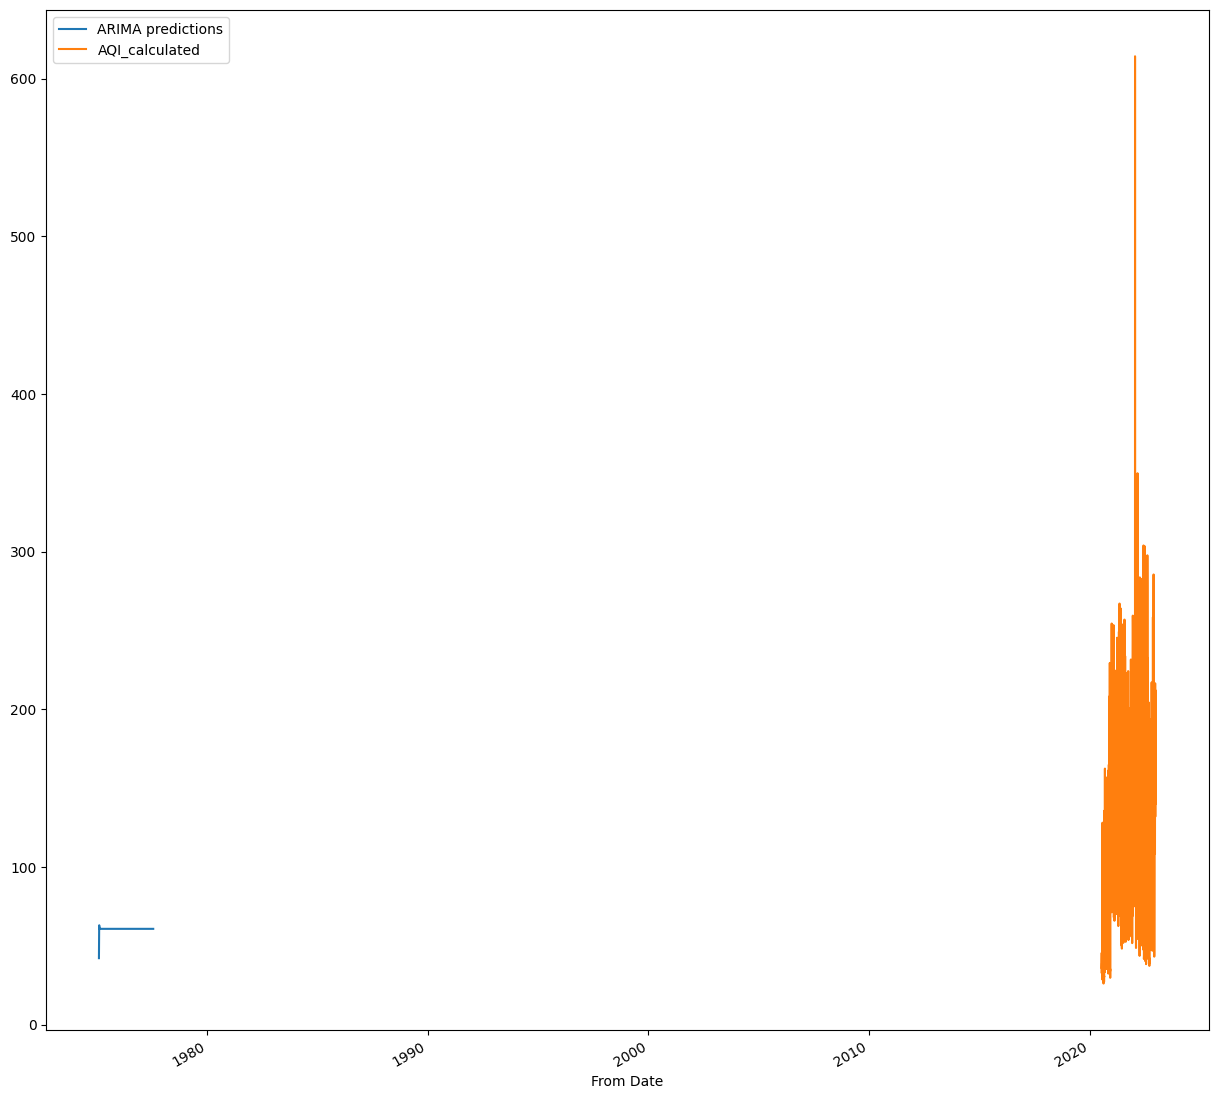

In [52]:
start=len(train)
end=len(train)+len(test)-1
#if the predicted values dont have date values as index, you will have to uncomment the following two commented lines to plot a graph
#index_future_dates=pd.date_range(start='2018-12-01',end='2018-12-30')
pred=model.predict(start=start,end=end,typ='levels').rename('ARIMA predictions')
print(start)

# pred.index=df.index[start:end+1]
print(end)
#pred.index=index_future_dates
pred.plot(legend=True)
test['AQI_calculated'].plot(legend=True)

<AxesSubplot:xlabel='From Date'>

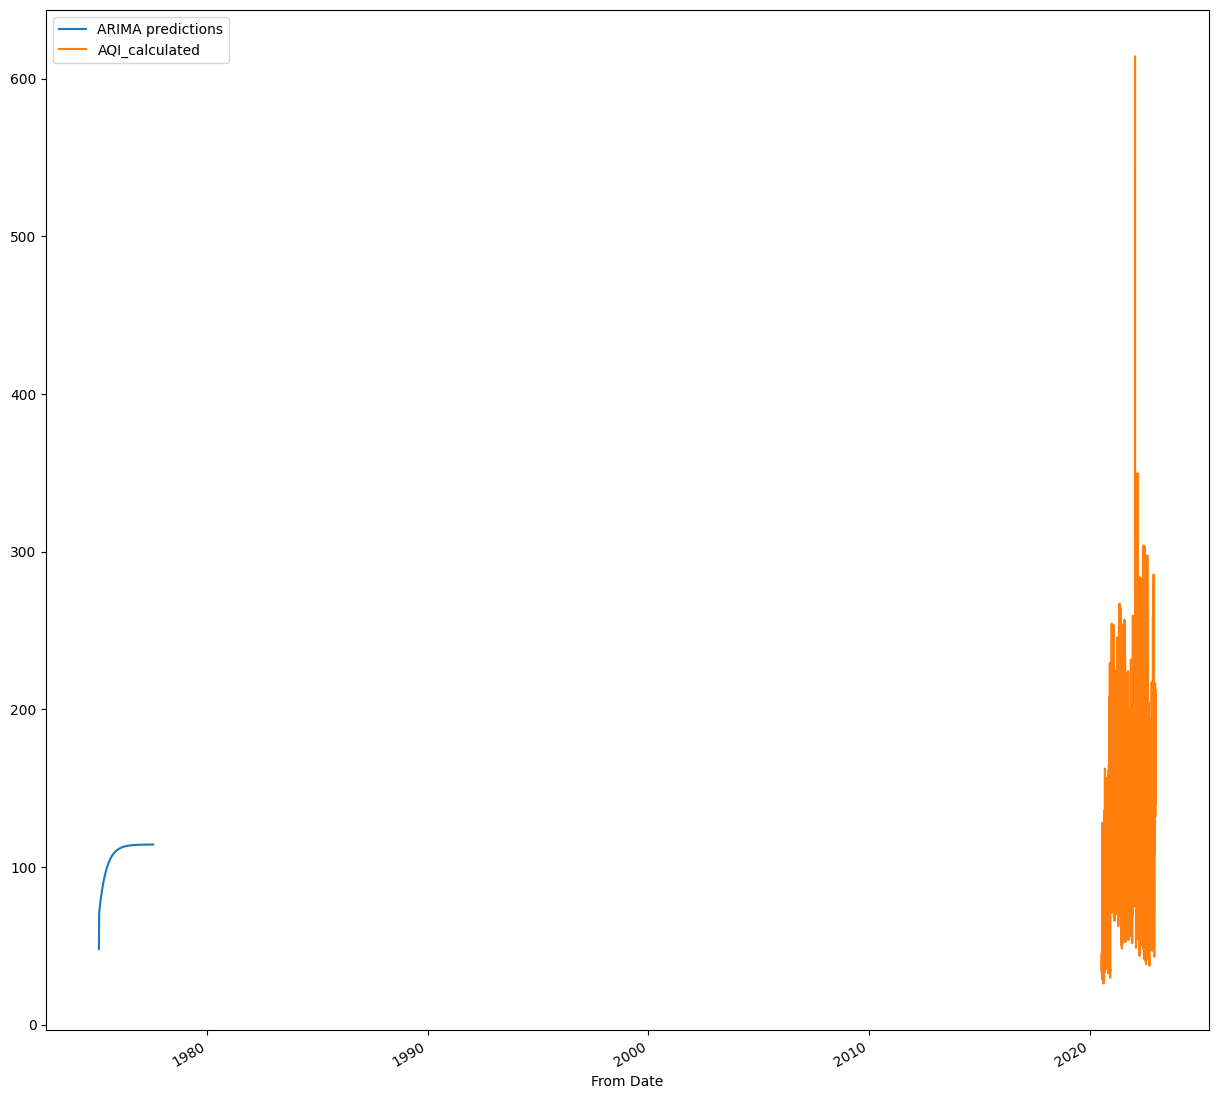

In [36]:
pred.plot(legend='ARIMA Predictions')
test['AQI_calculated'].plot(legend=True)

In [38]:
from sklearn.metrics import mean_squared_error
from math import sqrt
rmse=sqrt(mean_squared_error(pred,test['AQI_calculated']))
print(rmse)

59.308048455455605


In [53]:
test['AQI_calculated'].mean()

119.14846296296297

In [40]:
model2=ARIMA(dfs['AQI_calculated'],order=(1,0,5))
model2=model2.fit()
dfs.tail()

,AQI_calculated
From Date,
2022-12-28,182.6
2022-12-29,191.4
2022-12-30,211.6
2022-12-31,140.2
2023-01-01,142.2


In [42]:
index_future_dates=pd.date_range(start='2023-01-01',end='2023-01-31')
#print(index_future_dates)
pred=model2.predict(start=len(dfs),end=len(dfs)+30,typ='levels').rename('ARIMA Predictions')
#print(comp_pred)
pred.index=index_future_dates
print(pred)

2023-01-01    143.847127
2023-01-02    147.050760
2023-01-03    150.174064
2023-01-04    153.215299
2023-01-05    153.271241
2023-01-06    152.950177
2023-01-07    152.631875
2023-01-08    152.316312
2023-01-09    152.003463
2023-01-10    151.693307
2023-01-11    151.385819
2023-01-12    151.080976
2023-01-13    150.778756
2023-01-14    150.479137
2023-01-15    150.182095
2023-01-16    149.887609
2023-01-17    149.595656
2023-01-18    149.306216
2023-01-19    149.019265
2023-01-20    148.734784
2023-01-21    148.452750
2023-01-22    148.173142
2023-01-23    147.895940
2023-01-24    147.621124
2023-01-25    147.348671
2023-01-26    147.078563
2023-01-27    146.810779
2023-01-28    146.545298
2023-01-29    146.282102
2023-01-30    146.021170
2023-01-31    145.762483
Freq: D, Name: ARIMA Predictions, dtype: float64


<AxesSubplot:>

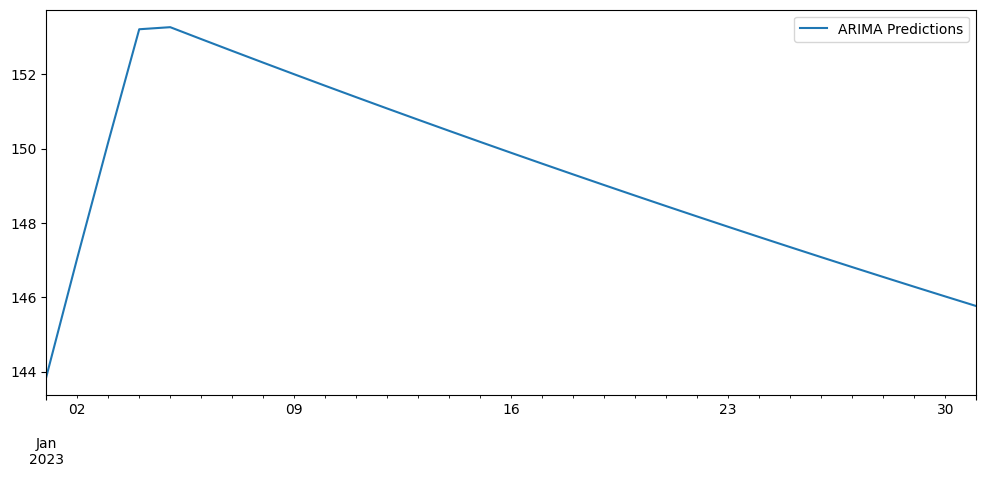

In [43]:
pred.plot(figsize=(12,5),legend=True)